In [1]:
#Import few basic libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading both train and test datasets into dataframes

train_df = pd.read_csv('Data/fashion_mnist_train.csv')
test_df = pd.read_csv('Data/fashion_mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- The first column consists of the class labels, and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. And first column is Label.
- Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

In [5]:
train_df['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

- So we have 10 unique class labels.
- Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [6]:
#convert df into numpy arrays data as float32

train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

Now let us slice the train arrays into x and y arrays namely x_train,y_train to store all image data and label data respectively. Similarly for Test Data as well.

Since the image data in x_train and x_test is from 0 to 255 , we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way

In [7]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [8]:
#split the training data into validation and actual training data for training the model 
#and testing it using the validation set.

from sklearn.model_selection import train_test_split

x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

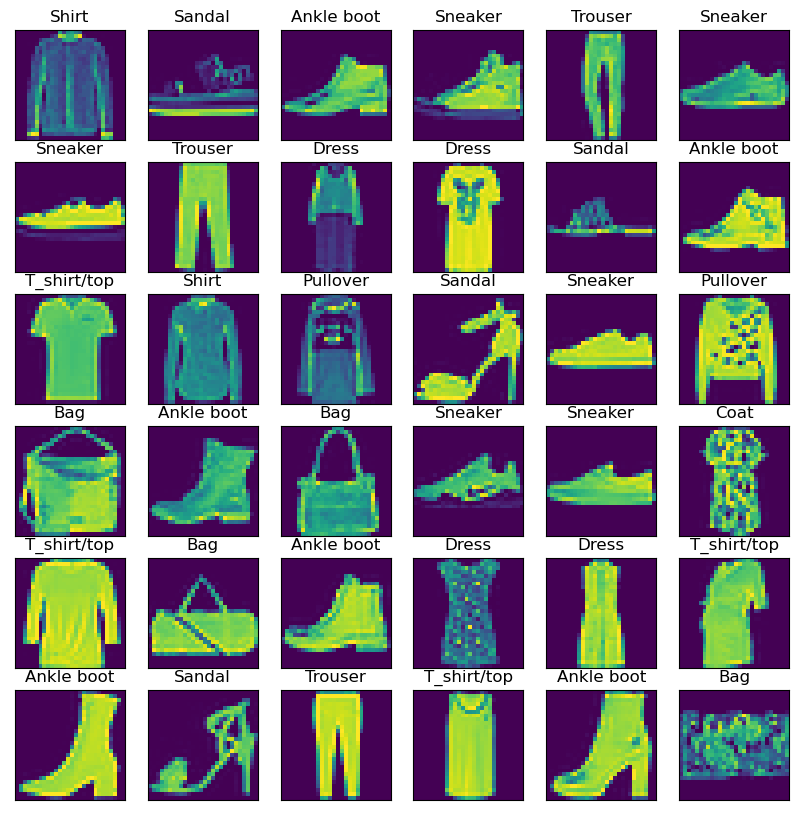

In [9]:
#let us visualise the data base don class labels

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [10]:
print('X_Train shape is : ', x_train.shape)
print('X_Test shape is : ', x_test.shape)
print('X_validation shape is : ', x_validate.shape)

X_Train shape is :  (48000, 784)
X_Test shape is :  (10000, 784)
X_validation shape is :  (12000, 784)


In [11]:
#define the shape of the image before we define the model

image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [12]:
#reshaping

x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

## Defining the Model

In [13]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

2023-04-25 16:15:22.735839: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [17]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

## Compile the Model

In [18]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

## Train the Model

In [19]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
12/12 [==============================] - 16s 1s/step - loss: 1.8201 - accuracy: 0.5090 - val_loss: 1.2192 - val_accuracy: 0.7122
Epoch 2/75
12/12 [==============================] - 16s 1s/step - loss: 0.9314 - accuracy: 0.7324 - val_loss: 0.7039 - val_accuracy: 0.7598
Epoch 3/75
12/12 [==============================] - 15s 1s/step - loss: 0.6477 - accuracy: 0.7721 - val_loss: 0.5875 - val_accuracy: 0.7839
Epoch 4/75
12/12 [==============================] - 17s 1s/step - loss: 0.5607 - accuracy: 0.8004 - val_loss: 0.5240 - val_accuracy: 0.8117
Epoch 5/75
12/12 [==============================] - 14s 1s/step - loss: 0.5106 - accuracy: 0.8209 - val_loss: 0.4860 - val_accuracy: 0.8292
Epoch 6/75
12/12 [==============================] - 14s 1s/step - loss: 0.4767 - accuracy: 0.8340 - val_loss: 0.4580 - val_accuracy: 0.8397
Epoch 7/75
12/12 [==============================] - 13s 1s/step - loss: 0.4515 - accuracy: 0.8442 - val_loss: 0.4372 - val_accuracy: 0.8460
Epoch 8/75
12/12 [==

Text(0.5, 1.0, 'Train - Accuracy')

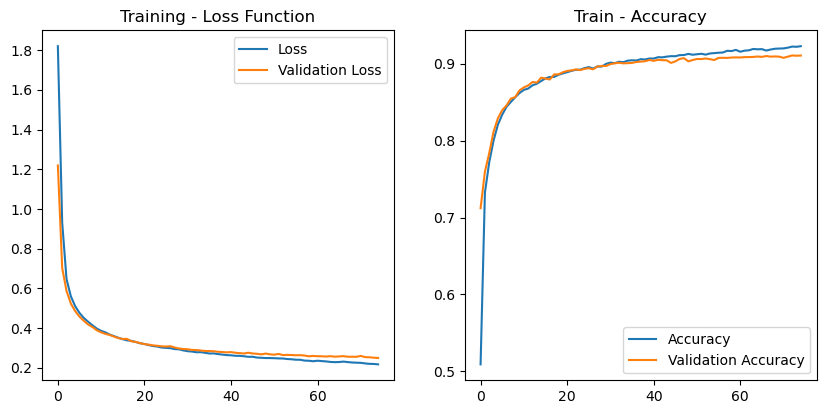

In [21]:
#Let us plot the Training Accuracy vs Loss to get a better understanding of the model training.

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

We can observe that there is minil difference in loss and minimal difference in Accuarcy and Validation Accuracy

In [22]:
#Evaluate /Score the model

score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2473
Test Accuracy : 0.9145


Test Accuracy of 91.45% is very good. It has paid off to do so many epochs.